In [1]:
import numpy as np
from numpy import load
import torch
import torch.nn as nn
import torch.nn.functional as F

from timeit import default_timer as timer


from tensorboardX import SummaryWriter
from datetime import datetime
from source.Data_load import Data_load
from source.transformer import Seq2SeqTransformer
from source.train import train_epoch,evaluate

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
mbrnlist1=[(5,194),(2,155),(12,100),(17,29),(42,1),(44,1),(50,92),(2,83),(4,10118),(8,298)]
mbrnlist2=[(5,194),(12,100),(2,155),(17,29),(42,1),(44,1),(2,83),(4,10118),(4,9997),(50,91)]

mbrnlist=mbrnlist1+mbrnlist2
mbrnlist=set(mbrnlist)
mbrnlist=list(mbrnlist)

# load array
MBR_NO,BRN_NO=mbrnlist[2]
featnorm=True

In [4]:
bptt = 39
TGT_VOCAB_SIZE = 3
EMB_SIZE =128
NHEAD = 16
FFN_HID_DIM = 128
BATCH_SIZE = 32
NUM_ENCODER_LAYERS = 3
NUM_DECODER_LAYERS = 3

In [5]:
MBR_NO=42
BRN_NO=1
if featnorm==True:
    Data_train = load('Data/Data0930_'+str(MBR_NO)+'_'+str(BRN_NO)+'norm_train.npy',allow_pickle=True)
    Data_test =  load('Data/Data0930_'+str(MBR_NO)+'_'+str(BRN_NO)+'norm_test.npy',allow_pickle=True)
else:
    Data_train = load('Data/Data0930_'+str(MBR_NO)+'_'+str(BRN_NO)+'train.npy',allow_pickle=True)
    Data_test =  load('Data/Data0930_'+str(MBR_NO)+'_'+str(BRN_NO)+'test.npy',allow_pickle=True)

Xtrain_data,Ytrain_data,Xtest_data,Ytest_data = Data_load(Data_train,Data_test)
torch.manual_seed(0)

SRC_VOCAB_SIZE = Xtrain_data.shape[1]


transformer = Seq2SeqTransformer(NUM_ENCODER_LAYERS, NUM_DECODER_LAYERS, EMB_SIZE,
                                 NHEAD, SRC_VOCAB_SIZE, TGT_VOCAB_SIZE, FFN_HID_DIM)
summary = SummaryWriter()
for p in transformer.parameters():
    if p.dim() > 1:
        nn.init.xavier_uniform_(p)

transformer = transformer.to(device)

loss_fn = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(transformer.parameters(), lr=0.0001, betas=(0.9, 0.98), eps=1e-9)
Val_loss=[]
Train_loss=[]
Accuracy=[]
F1score=[]
NUM_EPOCHS = 1000
best_val_loss=100000000
for epoch in range(1, NUM_EPOCHS+1):
    start_time = timer()
    train_loss,_ = train_epoch(transformer, optimizer,Xtrain_data,Ytrain_data,loss_fn,device,BATCH_SIZE,bptt)
    end_time = timer()
    val_loss,acc,prec,reca,f1sc,confusion = evaluate(transformer,Xtrain_data,Ytrain_data,loss_fn,device,BATCH_SIZE,bptt)
    print((f"Epoch: {epoch}, Train loss: {train_loss:.3f}, Val loss: {val_loss:.3f}, "f"Epoch time = {(end_time - start_time):.3f}s"))
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_confusion=confusion
        best_acc=acc
        best_prec=prec
        best_reca=reca
        best_f1sc=f1sc
        best_model = transformer
    Val_loss.append(val_loss)
    Train_loss.append(train_loss)
    Accuracy.append(acc)
    F1score.append(f1sc)
now = datetime.now()
now.strftime("%m/%d/%Y, %H:%M:%S")

date_time = now.strftime("%m_%d_%Y")

PATH='best_model_Trans_seq_'+date_time+'_'+str(MBR_NO)+'_'+str(BRN_NO)
if featnorm==True:
    torch.save(best_model.state_dict(), PATH+'norm')
else:
    torch.save(best_model.state_dict(), PATH)
if featnorm==True:
    file_name='results/result_Trans_'+date_time+'_norm.txt'
else:
    file_name='results/result_Trans_'+date_time+'.txt'
text_to_append=PATH+'\t'+"Acc:"+str(best_acc)+'\t'+"prec:"+str(best_prec)+'\t'+"recall:"+str(best_reca)+'\t'+"f1sc:"+str(best_f1sc)
print(text_to_append)
with open(file_name, "a+") as file_object:
    # Move read cursor to the start of file.
    file_object.seek(0)
    # If file is not empty then append '\n'
    data = file_object.read(100)
    if len(data) > 0:
        file_object.write("\n")
    # Append text at the end of file
    file_object.write(text_to_append)

468
468
72960
51392
Acc: 0.7043859649122807
Prec 0.5998909608965283
Recall 0.5799627419270175
F1 0.5897585534650248
468
468
Time elapsed 0.31664013862609863
72960
56773
Acc: 0.7781387061403509
Prec 0.6953316746421204
Recall 0.6827112662208145
F1 0.6889636802480132
Epoch: 1, Train loss: 0.001, Val loss: 0.000, Epoch time = 2.514s
468
468
72960
55470
Acc: 0.7602796052631579
Prec 0.6634370855218129
Recall 0.6547985057704784
F1 0.6590894907435118
468
468
Time elapsed 0.3019256591796875
72960
57058
Acc: 0.7820449561403509
Prec 0.7002173643582673
Recall 0.6904099900343118
F1 0.6952790940310632
Epoch: 2, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.108s
468
468
72960
55769
Acc: 0.7643777412280702
Prec 0.6693955590515799
Recall 0.661809259278923
F1 0.6655807926778979
468
468
Time elapsed 0.29994750022888184
72960
57082
Acc: 0.7823739035087719
Prec 0.7004489494405671
Recall 0.6919107035680315
F1 0.696153647333414
Epoch: 3, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.010s
468
468
72

468
468
72960
57112
Acc: 0.7827850877192982
Prec 0.6988295547911875
Recall 0.691461497335777
F1 0.695126001996711
468
468
Time elapsed 0.2970583438873291
72960
57403
Acc: 0.7867735745614035
Prec 0.7050931615104163
Recall 0.6965654540633958
F1 0.7008033664508724
Epoch: 26, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.077s
468
468
72960
57178
Acc: 0.7836896929824562
Prec 0.6997966922300148
Recall 0.6923025521143701
F1 0.696029450429301
468
468
Time elapsed 0.30040693283081055
72960
57390
Acc: 0.7865953947368421
Prec 0.7044118528140025
Recall 0.6984515239654225
F1 0.7014190266007704
Epoch: 27, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.052s
468
468
72960
57161
Acc: 0.7834566885964912
Prec 0.6991354511783815
Recall 0.6914714728325678
F1 0.6952823429663447
468
468
Time elapsed 0.2964942455291748
72960
57427
Acc: 0.7871025219298246
Prec 0.7054096490645666
Recall 0.6973312615761014
F1 0.7013471935961201
Epoch: 28, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.044s
468
468
7

468
468
72960
57339
Acc: 0.7858963815789474
Prec 0.7029649329102199
Recall 0.6948080204765872
F1 0.6988626762541803
468
468
Time elapsed 0.29523515701293945
72960
57574
Acc: 0.7891173245614035
Prec 0.7085175773798863
Recall 0.6968716563660449
F1 0.7026463642348337
Epoch: 51, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.095s
468
468
72960
57373
Acc: 0.7863623903508772
Prec 0.7031417023075534
Recall 0.6953129589782446
F1 0.6992054174469218
468
468
Time elapsed 0.29676032066345215
72960
57604
Acc: 0.7895285087719298
Prec 0.709007605664988
Recall 0.6981736545333729
F1 0.7035489245632832
Epoch: 52, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.027s
468
468
72960
57254
Acc: 0.7847313596491228
Prec 0.7009529595333651
Recall 0.6931622358917927
F1 0.6970358292909096
468
468
Time elapsed 0.3063623905181885
72960
57603
Acc: 0.7895148026315789
Prec 0.7086976799571737
Recall 0.6978078263891954
F1 0.7032105958868473
Epoch: 53, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.073s
468
46

468
468
72960
57544
Acc: 0.7887061403508772
Prec 0.7068230942740237
Recall 0.6980265399103613
F1 0.7023972770029225
468
468
Time elapsed 0.2990579605102539
72960
57822
Acc: 0.7925164473684211
Prec 0.7127393324371224
Recall 0.7026705795676543
F1 0.7076691431316834
Epoch: 76, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.093s
468
468
72960
57497
Acc: 0.788061951754386
Prec 0.7058723737561429
Recall 0.6965170329061955
F1 0.7011634985880347
468
468
Time elapsed 0.30033397674560547
72960
57821
Acc: 0.7925027412280702
Prec 0.7125894620825753
Recall 0.7029546043794764
F1 0.7077392435478368
Epoch: 77, Train loss: 0.000, Val loss: 0.000, Epoch time = 1.993s
468
468
72960
57507
Acc: 0.7881990131578948
Prec 0.706454620337526
Recall 0.6973583357050157
F1 0.701877007430563
468
468
Time elapsed 0.3018953800201416
72960
57827
Acc: 0.7925849780701755
Prec 0.7127135522847743
Recall 0.7028493670524649
F1 0.7077470909560148
Epoch: 78, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.112s
468
468
7

468
468
72960
57693
Acc: 0.7907483552631579
Prec 0.7102112588320432
Recall 0.6999573028056494
F1 0.7050470003060582
468
468
Time elapsed 0.29598212242126465
72960
58103
Acc: 0.7963678728070176
Prec 0.7194527960679175
Recall 0.7063562420668995
F1 0.7128443708560722
Epoch: 101, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.057s
468
468
72960
57655
Acc: 0.7902275219298246
Prec 0.7094343307684832
Recall 0.699157714441187
F1 0.7042585352274578
468
468
Time elapsed 0.3326683044433594
72960
58072
Acc: 0.7959429824561404
Prec 0.7184130046460271
Recall 0.7058400634300659
F1 0.7120710386860044
Epoch: 102, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.056s
468
468
72960
57662
Acc: 0.7903234649122807
Prec 0.7093707383708203
Recall 0.6993657623674333
F1 0.7043327222399216
468
468
Time elapsed 0.2996101379394531
72960
58094
Acc: 0.7962445175438596
Prec 0.718624808423857
Recall 0.7071382276242274
F1 0.7128352475235697
Epoch: 103, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.034s
468
4

468
468
72960
57890
Acc: 0.7934484649122807
Prec 0.7142163068413186
Recall 0.7037099218500981
F1 0.7089241898504314
468
468
Time elapsed 0.3009827136993408
72960
58367
Acc: 0.7999862938596491
Prec 0.7243224132900455
Recall 0.7125277536468166
F1 0.7183766741076986
Epoch: 126, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.094s
468
468
72960
57781
Acc: 0.7919544956140351
Prec 0.7117818240569233
Recall 0.7012324226446703
F1 0.7064677430436214
468
468
Time elapsed 0.30114078521728516
72960
58348
Acc: 0.7997258771929825
Prec 0.7243158628801788
Recall 0.7108915727541043
F1 0.7175409354064202
Epoch: 127, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.062s
468
468
72960
57881
Acc: 0.7933251096491228
Prec 0.7136441057068024
Recall 0.7027961257032272
F1 0.7081785754170632
468
468
Time elapsed 0.3007931709289551
72960
58423
Acc: 0.8007538377192982
Prec 0.7258182626553685
Recall 0.7137022087819008
F1 0.7197092469468952
Epoch: 128, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.036s
468

468
468
72960
58112
Acc: 0.7964912280701755
Prec 0.7195821762163949
Recall 0.7079116976793586
F1 0.7136992309395449
468
468
Time elapsed 0.3000071048736572
72960
58690
Acc: 0.8044133771929824
Prec 0.7313083088323143
Recall 0.7188325367985867
F1 0.7250167573772601
Epoch: 151, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.092s
468
468
72960
58092
Acc: 0.7962171052631579
Prec 0.7186297633535306
Recall 0.7068553772406444
F1 0.7126939425827791
468
468
Time elapsed 0.3222041130065918
72960
58728
Acc: 0.8049342105263158
Prec 0.7318623750575003
Recall 0.7195369842599465
F1 0.7256473455932103
Epoch: 152, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.058s
468
468
72960
58145
Acc: 0.7969435307017544
Prec 0.7196050734344973
Recall 0.7082577747012732
F1 0.7138863352875766
468
468
Time elapsed 0.29879236221313477
72960
58710
Acc: 0.8046875
Prec 0.7321611597027154
Recall 0.718628798053345
F1 0.7253318667745757
Epoch: 153, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.058s
468
468
72960

468
468
72960
58374
Acc: 0.8000822368421052
Prec 0.7249583467963171
Recall 0.7121019781995089
F1 0.7184726540514609
468
468
Time elapsed 0.30216145515441895
72960
59022
Acc: 0.8089638157894737
Prec 0.7404083895407648
Recall 0.7232676501300838
F1 0.7317376544063329
Epoch: 176, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.074s
468
468
72960
58273
Acc: 0.7986979166666667
Prec 0.7225863644915295
Recall 0.7100183976665648
F1 0.716247252897749
468
468
Time elapsed 0.2989211082458496
72960
59127
Acc: 0.8104029605263158
Prec 0.7412698997863725
Recall 0.7252565174957523
F1 0.7331757815039294
Epoch: 177, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.054s
468
468
72960
58263
Acc: 0.7985608552631579
Prec 0.722103936130129
Recall 0.7094758545766862
F1 0.7157341986871247
468
468
Time elapsed 0.2991065979003906
72960
59065
Acc: 0.8095531798245614
Prec 0.7400843717053616
Recall 0.7255600322166268
F1 0.7327502348327399
Epoch: 178, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.076s
468
4

468
468
72960
58563
Acc: 0.8026726973684211
Prec 0.7287575615375816
Recall 0.7157299730012866
F1 0.7221850204616518
468
468
Time elapsed 0.30370569229125977
72960
59458
Acc: 0.8149396929824562
Prec 0.7480628091072862
Recall 0.73310197710056
F1 0.740506835510191
Epoch: 201, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.025s
468
468
72960
58532
Acc: 0.8022478070175438
Prec 0.7279261049412588
Recall 0.7147873393160125
F1 0.7212968948764387
468
468
Time elapsed 0.2966580390930176
72960
59506
Acc: 0.8155975877192982
Prec 0.749447134796371
Recall 0.7334823410257555
F1 0.7413788017137276
Epoch: 202, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.058s
468
468
72960
58652
Acc: 0.8038925438596491
Prec 0.7306496358755951
Recall 0.7174275606206105
F1 0.7239782343136139
468
468
Time elapsed 0.2980613708496094
72960
59454
Acc: 0.8148848684210527
Prec 0.7494838074675996
Recall 0.731932556469825
F1 0.7406042117348586
Epoch: 203, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.062s
468
468


468
468
72960
58868
Acc: 0.8068530701754386
Prec 0.7351378902263447
Recall 0.7212889727713551
F1 0.7281475879884245
468
468
Time elapsed 0.29178953170776367
72960
59879
Acc: 0.8207099780701754
Prec 0.7573915410961577
Recall 0.7402811684645378
F1 0.748738614850347
Epoch: 226, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.097s
468
468
72960
58830
Acc: 0.8063322368421053
Prec 0.7342280489333044
Recall 0.7206196072387013
F1 0.7273601823549294
468
468
Time elapsed 0.2985649108886719
72960
59943
Acc: 0.8215871710526316
Prec 0.7576126044035288
Recall 0.743284806833012
F1 0.7503803179384447
Epoch: 227, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.102s
468
468
72960
58994
Acc: 0.8085800438596491
Prec 0.7377124260147679
Recall 0.7241307448577929
F1 0.7308584931474751
468
468
Time elapsed 0.29822611808776855
72960
59984
Acc: 0.8221491228070176
Prec 0.759125072433494
Recall 0.7427676674102202
F1 0.7508572940870798
Epoch: 228, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.044s
468
4

468
468
72960
59029
Acc: 0.8090597587719298
Prec 0.7387842786894909
Recall 0.7248250177062604
F1 0.7317380795556574
468
468
Time elapsed 0.29796695709228516
72960
60283
Acc: 0.8262472587719298
Prec 0.7652711835345146
Recall 0.7497874790376636
F1 0.7574502105527247
Epoch: 251, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.088s
468
468
72960
59101
Acc: 0.8100466008771929
Prec 0.7403382126163031
Recall 0.726151708207059
F1 0.7331763418332319
468
468
Time elapsed 0.29115843772888184
72960
60342
Acc: 0.8270559210526316
Prec 0.7682984436975433
Recall 0.7494519562502213
F1 0.758758187950985
Epoch: 252, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.101s
468
468
72960
59214
Acc: 0.8115953947368421
Prec 0.7425166744569403
Recall 0.7280150785600464
F1 0.7351943730257819
468
468
Time elapsed 0.2990851402282715
72960
60383
Acc: 0.8276178728070176
Prec 0.7673765127744098
Recall 0.7519505515994788
F1 0.759585221109708
Epoch: 253, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.022s
468
4

468
468
72960
59397
Acc: 0.8141036184210526
Prec 0.7462300680159796
Recall 0.7319462907139466
F1 0.739019166525998
468
468
Time elapsed 0.3304133415222168
72960
60658
Acc: 0.8313870614035088
Prec 0.7726932429847891
Recall 0.7576832627263034
F1 0.7651146436794646
Epoch: 276, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.106s
468
468
72960
59510
Acc: 0.8156524122807017
Prec 0.7487944769057112
Recall 0.7340747651407146
F1 0.7413615633630022
468
468
Time elapsed 0.30126047134399414
72960
60592
Acc: 0.8304824561403509
Prec 0.772229274453645
Recall 0.7573568324358063
F1 0.7647207497245959
Epoch: 277, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.029s
468
468
72960
59418
Acc: 0.8143914473684211
Prec 0.7466804396454089
Recall 0.7321704491769324
F1 0.7393542608236344
468
468
Time elapsed 0.30144190788269043
72960
60712
Acc: 0.8321271929824562
Prec 0.7753359375205119
Recall 0.7585159369195464
F1 0.7668337143577922
Epoch: 278, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.074s
468


468
468
72960
59786
Acc: 0.8194353070175439
Prec 0.754706892408195
Recall 0.7402207701868663
F1 0.7473936447118309
468
468
Time elapsed 0.3008267879486084
72960
61061
Acc: 0.8369106359649123
Prec 0.7822491570635615
Recall 0.7654280337115625
F1 0.7737471841447947
Epoch: 301, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.085s
468
468
72960
59667
Acc: 0.8178042763157894
Prec 0.752357405320801
Recall 0.7374366475186901
F1 0.7448223083696348
468
468
Time elapsed 0.30074620246887207
72960
61060
Acc: 0.8368969298245614
Prec 0.7838632583392461
Recall 0.7657587532807729
F1 0.7747052467600752
Epoch: 302, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.064s
468
468
72960
59703
Acc: 0.8182976973684211
Prec 0.7532806072328615
Recall 0.7379570141906436
F1 0.745540079964771
468
468
Time elapsed 0.29862189292907715
72960
61149
Acc: 0.8381167763157895
Prec 0.783196728305104
Recall 0.7683452469027962
F1 0.7756999078319016
Epoch: 303, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.026s
468
46

468
468
72960
59988
Acc: 0.8222039473684211
Prec 0.758767457854213
Recall 0.7443334225344826
F1 0.7514811363377905
468
468
Time elapsed 0.3110809326171875
72960
61470
Acc: 0.842516447368421
Prec 0.7904365694155402
Recall 0.7742846319671276
F1 0.7822772359733551
Epoch: 326, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.066s
468
468
72960
60033
Acc: 0.8228207236842106
Prec 0.7601999514361761
Recall 0.7451196982246594
F1 0.7525842880376261
468
468
Time elapsed 0.29084062576293945
72960
61435
Acc: 0.8420367324561403
Prec 0.7892497733462606
Recall 0.7749197668799651
F1 0.7820191285442026
Epoch: 327, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.050s
468
468
72960
59978
Acc: 0.8220668859649123
Prec 0.7587056199618054
Recall 0.7437933848057628
F1 0.7511755007516221
468
468
Time elapsed 0.2975735664367676
72960
61503
Acc: 0.84296875
Prec 0.7897862583604485
Recall 0.7764957543258332
F1 0.7830846188292502
Epoch: 328, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.081s
468
468
72960

468
468
72960
60199
Acc: 0.8250959429824561
Prec 0.7632983493793911
Recall 0.7481373055240527
F1 0.7556417880748427
468
468
Time elapsed 0.2987990379333496
72960
61894
Acc: 0.848327850877193
Prec 0.8003189447528191
Recall 0.7844437698003405
F1 0.792301843423352
Epoch: 351, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.096s
468
468
72960
60233
Acc: 0.825561951754386
Prec 0.7638916291443234
Recall 0.7491392424610909
F1 0.7564435162811244
468
468
Time elapsed 0.29906201362609863
72960
61983
Acc: 0.8495476973684211
Prec 0.8004740394918458
Recall 0.7866067103095379
F1 0.7934797910839344
Epoch: 352, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.050s
468
468
72960
60199
Acc: 0.8250959429824561
Prec 0.7638791675625264
Recall 0.7488352795309857
F1 0.7562824180976706
468
468
Time elapsed 0.2924385070800781
72960
62052
Acc: 0.8504934210526316
Prec 0.8018710956490969
Recall 0.7870587968827074
F1 0.7943959047695541
Epoch: 353, Train loss: 0.000, Val loss: 0.000, Epoch time = 1.998s
468
46

468
468
72960
60390
Acc: 0.8277138157894737
Prec 0.7667474973199283
Recall 0.7525367463015794
F1 0.759575661092375
468
468
Time elapsed 0.2990992069244385
72960
62351
Acc: 0.8545915570175439
Prec 0.8078652217633108
Recall 0.7941465750562567
F1 0.8009471593705811
Epoch: 376, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.078s
468
468
72960
60440
Acc: 0.8283991228070176
Prec 0.7683248473590267
Recall 0.7534927513575681
F1 0.7608365203046242
468
468
Time elapsed 0.29954004287719727
72960
62386
Acc: 0.8550712719298246
Prec 0.8081459934086124
Recall 0.7943054418131928
F1 0.8011659464177623
Epoch: 377, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.106s
468
468
72960
60433
Acc: 0.8283031798245614
Prec 0.7676358095796951
Recall 0.7534871767760948
F1 0.7604956918547913
468
468
Time elapsed 0.30338263511657715
72960
62324
Acc: 0.8542214912280702
Prec 0.8092331520925212
Recall 0.7934329206960369
F1 0.8012551513886559
Epoch: 378, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.022s
468

468
468
72960
60654
Acc: 0.8313322368421052
Prec 0.7725257114923876
Recall 0.7578952974762884
F1 0.7651405730690515
468
468
Time elapsed 0.29609251022338867
72960
62746
Acc: 0.8600054824561404
Prec 0.8169658881913481
Recall 0.8026509029979279
F1 0.809745134086668
Epoch: 401, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.082s
468
468
72960
60694
Acc: 0.8318804824561403
Prec 0.7738430446015238
Recall 0.7590549481110912
F1 0.7663776648656115
468
468
Time elapsed 0.30011701583862305
72960
62645
Acc: 0.8586211622807017
Prec 0.8125092365693128
Recall 0.7999958711191099
F1 0.8062040007220713
Epoch: 402, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.125s
468
468
72960
60640
Acc: 0.831140350877193
Prec 0.7720946180169602
Recall 0.7578631080085785
F1 0.7649126729887988
468
468
Time elapsed 0.2995326519012451
72960
62777
Acc: 0.8604303728070175
Prec 0.8166690517215155
Recall 0.8020710387909032
F1 0.8093042218473832
Epoch: 403, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.082s
468


468
468
72960
61039
Acc: 0.836609100877193
Prec 0.7809525086680247
Recall 0.7660621767759898
F1 0.7734356814811861
468
468
Time elapsed 0.2990381717681885
72960
63121
Acc: 0.8651452850877193
Prec 0.8240509639438415
Recall 0.8083022010672823
F1 0.8161006113439719
Epoch: 426, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.064s
468
468
72960
61043
Acc: 0.8366639254385965
Prec 0.7808602522884311
Recall 0.7663832742403317
F1 0.773554035434272
468
468
Time elapsed 0.3000757694244385
72960
63133
Acc: 0.8653097587719298
Prec 0.8229888196500307
Recall 0.810256048861648
F1 0.8165728019394992
Epoch: 427, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.028s
468
468
72960
61076
Acc: 0.8371162280701754
Prec 0.781360813064568
Recall 0.7667131787204498
F1 0.7739676990782036
468
468
Time elapsed 0.32305240631103516
72960
63075
Acc: 0.864514802631579
Prec 0.8217499335363896
Recall 0.8092674219602988
F1 0.8154609121329991
Epoch: 428, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.051s
468
468


468
468
72960
61218
Acc: 0.8390625
Prec 0.78392654197728
Recall 0.7697681097755854
F1 0.7767828147441507
468
468
Time elapsed 0.30122900009155273
72960
63467
Acc: 0.8698876096491228
Prec 0.8299869262146734
Recall 0.8165691524702243
F1 0.8232233686711649
Epoch: 451, Train loss: 0.000, Val loss: 0.000, Epoch time = 1.989s
468
468
72960
61253
Acc: 0.8395422149122806
Prec 0.7856499958441284
Recall 0.7710449243097307
F1 0.7782789469367623
468
468
Time elapsed 0.30065393447875977
72960
63491
Acc: 0.8702165570175439
Prec 0.8306467418394871
Recall 0.8166231537048575
F1 0.8235752547538328
Epoch: 452, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.051s
468
468
72960
61151
Acc: 0.8381441885964912
Prec 0.7830446215079551
Recall 0.7681993904918851
F1 0.7755509724029437
468
468
Time elapsed 0.29796433448791504
72960
63421
Acc: 0.8692571271929824
Prec 0.8293434064844473
Recall 0.8150045416005461
F1 0.82211145593421
Epoch: 453, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.030s
468
468
72960


468
468
72960
61518
Acc: 0.8431743421052632
Prec 0.79149352295192
Recall 0.7762863961657037
F1 0.7838162066352439
468
468
Time elapsed 0.30290985107421875
72960
63741
Acc: 0.8736430921052631
Prec 0.8368349219622683
Recall 0.8216358715815356
F1 0.8291657509471532
Epoch: 476, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.049s
468
468
72960
61438
Acc: 0.842077850877193
Prec 0.7889653828090889
Recall 0.7745051220907656
F1 0.7816683822597361
468
468
Time elapsed 0.3017003536224365
72960
63789
Acc: 0.8743009868421052
Prec 0.8363638927223161
Recall 0.8227883986366068
F1 0.8295206070647632
Epoch: 477, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.077s
468
468
72960
61470
Acc: 0.842516447368421
Prec 0.789403020770556
Recall 0.7752434703432849
F1 0.7822591758550929
468
468
Time elapsed 0.3019733428955078
72960
63707
Acc: 0.8731770833333333
Prec 0.8353292732442005
Recall 0.8204585863081966
F1 0.827827152704283
Epoch: 478, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.065s
468
468
7

468
468
72960
61628
Acc: 0.8446820175438596
Prec 0.7928609649522235
Recall 0.7787816972943675
F1 0.7857582678766227
468
468
Time elapsed 0.29645276069641113
72960
64052
Acc: 0.877905701754386
Prec 0.8414396481808848
Recall 0.8294110677430848
F1 0.8353820606326753
Epoch: 501, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.037s
468
468
72960
61708
Acc: 0.8457785087719298
Prec 0.7947274753707858
Recall 0.7809200557092458
F1 0.7877632682416197
468
468
Time elapsed 0.2964608669281006
72960
64020
Acc: 0.8774671052631579
Prec 0.8421632044840927
Recall 0.8281342514591404
F1 0.8350898128597376
Epoch: 502, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.079s
468
468
72960
61705
Acc: 0.8457373903508771
Prec 0.7944148991934809
Recall 0.7802213617828753
F1 0.7872541612689943
468
468
Time elapsed 0.2972424030303955
72960
64033
Acc: 0.8776452850877193
Prec 0.8423680457213218
Recall 0.8284474701922312
F1 0.8353497675858423
Epoch: 503, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.055s
468


468
468
72960
61919
Acc: 0.8486705043859649
Prec 0.7988814492767854
Recall 0.7848515182963376
F1 0.7918043397991135
468
468
Time elapsed 0.3002915382385254
72960
64233
Acc: 0.8803865131578947
Prec 0.8461944265571667
Recall 0.8324217953133441
F1 0.8392516104174758
Epoch: 526, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.009s
468
468
72960
61926
Acc: 0.8487664473684211
Prec 0.79912346664817
Recall 0.784862054251604
F1 0.7919285591422167
468
468
Time elapsed 0.3038642406463623
72960
64320
Acc: 0.881578947368421
Prec 0.8478570125672106
Recall 0.8351993644615968
F1 0.8414805917559848
Epoch: 527, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.077s
468
468
72960
61953
Acc: 0.8491365131578947
Prec 0.8000011327858828
Recall 0.78548022048279
F1 0.7926741804583709
468
468
Time elapsed 0.3036506175994873
72960
64351
Acc: 0.8820038377192982
Prec 0.8475025864119746
Recall 0.836047721872356
F1 0.841736184733002
Epoch: 528, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.086s
468
468
7296

468
468
72960
62138
Acc: 0.851672149122807
Prec 0.8033674769314061
Recall 0.7887726302733024
F1 0.7960031595055315
468
468
Time elapsed 0.3024153709411621
72960
64587
Acc: 0.8852384868421053
Prec 0.8525451671880186
Recall 0.8407700019290134
F1 0.8466166428249848
Epoch: 551, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.106s
468
468
72960
62214
Acc: 0.8527138157894737
Prec 0.8055003488289353
Recall 0.7911471801175699
F1 0.7982592500928642
468
468
Time elapsed 0.30106663703918457
72960
64619
Acc: 0.8856770833333333
Prec 0.853800751233468
Recall 0.8411361008877342
F1 0.8474211106198578
Epoch: 552, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.061s
468
468
72960
62154
Acc: 0.851891447368421
Prec 0.8036984193411406
Recall 0.78940016849385
F1 0.7964851296595977
468
468
Time elapsed 0.3039236068725586
72960
64660
Acc: 0.8862390350877193
Prec 0.8538850928540538
Recall 0.8417680816473044
F1 0.8477832936211821
Epoch: 553, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.050s
468
468


468
468
72960
62307
Acc: 0.8539884868421053
Prec 0.807420545501713
Recall 0.7927651309988729
F1 0.8000257269214628
468
468
Time elapsed 0.2953524589538574
72960
64916
Acc: 0.8897478070175439
Prec 0.859554456017794
Recall 0.847668457868968
F1 0.8535700806969504
Epoch: 576, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.060s
468
468
72960
62260
Acc: 0.8533442982456141
Prec 0.8059902735891278
Recall 0.7915525114871228
F1 0.798706152039886
468
468
Time elapsed 0.3018486499786377
72960
64942
Acc: 0.8901041666666667
Prec 0.860704456825645
Recall 0.8487409422636576
F1 0.854680836353013
Epoch: 577, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.065s
468
468
72960
62286
Acc: 0.8537006578947368
Prec 0.8068059049844735
Recall 0.7924355344418932
F1 0.7995561554940355
468
468
Time elapsed 0.30143189430236816
72960
64973
Acc: 0.8905290570175438
Prec 0.8608893807100264
Recall 0.8494758825290378
F1 0.8551445497128402
Epoch: 578, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.069s
468
468
7

468
468
72960
62523
Acc: 0.8569490131578947
Prec 0.8119859423955965
Recall 0.7972127356575203
F1 0.8045315265058601
468
468
Time elapsed 0.2985045909881592
72960
65218
Acc: 0.8938870614035088
Prec 0.8674362732564159
Recall 0.8535917568486225
F1 0.8604583301272267
Epoch: 601, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.142s
468
468
72960
62597
Acc: 0.8579632675438597
Prec 0.8138062739083677
Recall 0.7991972184185117
F1 0.8064355886804209
468
468
Time elapsed 0.29819655418395996
72960
65159
Acc: 0.8930783991228071
Prec 0.864647284364609
Recall 0.8529075397880748
F1 0.8587372906197269
Epoch: 602, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.019s
468
468
72960
62565
Acc: 0.8575246710526315
Prec 0.8130661392127839
Recall 0.7985091663970815
F1 0.8057219079846877
468
468
Time elapsed 0.2951693534851074
72960
65259
Acc: 0.8944490131578947
Prec 0.8703435062070102
Recall 0.8542937686786999
F1 0.8622439567901523
Epoch: 603, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.061s
468


468
468
72960
62749
Acc: 0.860046600877193
Prec 0.8166444044508471
Recall 0.802886766440512
F1 0.8097071510644754
468
468
Time elapsed 0.30307888984680176
72960
65433
Acc: 0.8968338815789474
Prec 0.8713921480139063
Recall 0.8580756717278497
F1 0.8646826430769392
Epoch: 626, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.047s
468
468
72960
62747
Acc: 0.8600191885964912
Prec 0.8157862115326378
Recall 0.8021874773669011
F1 0.8089296971759358
468
468
Time elapsed 0.29572629928588867
72960
65529
Acc: 0.8981496710526315
Prec 0.8736725901169922
Recall 0.8600292632338515
F1 0.8667972437517748
Epoch: 627, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.068s
468
468
72960
62752
Acc: 0.8600877192982456
Prec 0.8162507854524564
Recall 0.8022883976891703
F1 0.8092093680451543
468
468
Time elapsed 0.3069899082183838
72960
65568
Acc: 0.8986842105263158
Prec 0.8751515863840361
Recall 0.860507988383237
F1 0.867768014048149
Epoch: 628, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.104s
468
46

468
468
72960
63053
Acc: 0.8642132675438596
Prec 0.8225161508021827
Recall 0.8092732697761456
F1 0.8158409736073172
468
468
Time elapsed 0.3010854721069336
72960
65775
Acc: 0.9015213815789473
Prec 0.877900382836179
Recall 0.8658736767819258
F1 0.8718455560706062
Epoch: 651, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.041s
468
468
72960
62905
Acc: 0.8621847587719298
Prec 0.8197672612576836
Recall 0.805579143853877
F1 0.8126112764719525
468
468
Time elapsed 0.30158185958862305
72960
65727
Acc: 0.9008634868421053
Prec 0.8771463633997532
Recall 0.8647152028962742
F1 0.8708864243555431
Epoch: 652, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.003s
468
468
72960
62899
Acc: 0.8621025219298246
Prec 0.8195768853329435
Recall 0.8058265640673108
F1 0.8126435633448716
468
468
Time elapsed 0.3011775016784668
72960
65640
Acc: 0.899671052631579
Prec 0.8771128004993853
Recall 0.8632162108306537
F1 0.8701090232811817
Epoch: 653, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.040s
468
46

468
468
72960
63148
Acc: 0.865515350877193
Prec 0.8248899935354151
Recall 0.8111695062416944
F1 0.8179722178209244
468
468
Time elapsed 0.29401588439941406
72960
65979
Acc: 0.9043174342105263
Prec 0.8820411931923434
Recall 0.8710521129742465
F1 0.8765122111389857
Epoch: 676, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.058s
468
468
72960
63196
Acc: 0.8661732456140351
Prec 0.8257954834548845
Recall 0.8116889638960446
F1 0.8186814616039878
468
468
Time elapsed 0.29401612281799316
72960
66027
Acc: 0.9049753289473684
Prec 0.8829259801911084
Recall 0.8720515761558953
F1 0.8774550875252387
Epoch: 677, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.041s
468
468
72960
63070
Acc: 0.8644462719298246
Prec 0.8230040966065952
Recall 0.809266345213597
F1 0.8160774100815409
468
468
Time elapsed 0.3020648956298828
72960
66062
Acc: 0.9054550438596491
Prec 0.8848316907316277
Recall 0.8724814002063663
F1 0.8786131469201429
Epoch: 678, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.073s
468


468
468
72960
63339
Acc: 0.8681332236842105
Prec 0.8282689402107545
Recall 0.815169264667098
F1 0.8216668943611173
468
468
Time elapsed 0.2965099811553955
72960
66134
Acc: 0.9064418859649123
Prec 0.8868411845874254
Recall 0.8740506345718105
F1 0.8803994563654222
Epoch: 701, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.068s
468
468
72960
63365
Acc: 0.8684895833333334
Prec 0.8290113891336022
Recall 0.8153656183937651
F1 0.822131884430577
468
468
Time elapsed 0.29975008964538574
72960
66251
Acc: 0.9080455043859649
Prec 0.8884112667683922
Recall 0.875887682095458
F1 0.8821050261333073
Epoch: 702, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.065s
468
468
72960
63279
Acc: 0.8673108552631579
Prec 0.8271267509480481
Recall 0.8141380845869808
F1 0.8205810228158326
468
468
Time elapsed 0.3100292682647705
72960
66118
Acc: 0.9062225877192982
Prec 0.8863495954496082
Recall 0.8730146145814692
F1 0.8796315692271727
Epoch: 703, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.084s
468
46

468
468
72960
63480
Acc: 0.8700657894736842
Prec 0.8315353485352821
Recall 0.8181215994353113
F1 0.8247739388090171
468
468
Time elapsed 0.29753541946411133
72960
66238
Acc: 0.9078673245614035
Prec 0.8897046706258056
Recall 0.8769069160186379
F1 0.883259438332754
Epoch: 726, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.060s
468
468
72960
63371
Acc: 0.8685718201754385
Prec 0.8291595563542424
Recall 0.8159326563587599
F1 0.822492932776887
468
468
Time elapsed 0.3025503158569336
72960
66270
Acc: 0.9083059210526315
Prec 0.890462017414209
Recall 0.8771694712310413
F1 0.8837657645091951
Epoch: 727, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.130s
468
468
72960
63505
Acc: 0.8704084429824561
Prec 0.832798349005917
Recall 0.8188185644221915
F1 0.825749292153732
468
468
Time elapsed 0.2989828586578369
72960
66329
Acc: 0.9091145833333333
Prec 0.8903599098038538
Recall 0.8784812346535592
F1 0.8843806865318569
Epoch: 728, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.063s
468
468


468
468
72960
63635
Acc: 0.8721902412280702
Prec 0.8350509395758401
Recall 0.8217156746234066
F1 0.8283296395251358
468
468
Time elapsed 0.3006470203399658
72960
66642
Acc: 0.9134046052631579
Prec 0.8956842222243037
Recall 0.8850924531576276
F1 0.8903568386339775
Epoch: 751, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.040s
468
468
72960
63709
Acc: 0.8732044956140351
Prec 0.8364279777570544
Recall 0.8227133242849587
F1 0.8295139675668521
468
468
Time elapsed 0.3177964687347412
72960
66590
Acc: 0.9126918859649122
Prec 0.8962606462905987
Recall 0.8834155349271561
F1 0.8897917347359156
Epoch: 752, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.081s
468
468
72960
63648
Acc: 0.8723684210526316
Prec 0.8351157774565485
Recall 0.8213125937587634
F1 0.8281566739507967
468
468
Time elapsed 0.30089664459228516
72960
66647
Acc: 0.9134731359649123
Prec 0.8967995076792737
Recall 0.8849489131364235
F1 0.890834800637822
Epoch: 753, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.065s
468


468
468
72960
63700
Acc: 0.8730811403508771
Prec 0.8362374953349617
Recall 0.8227211094053835
F1 0.8294242399086755
468
468
Time elapsed 0.29283809661865234
72960
66669
Acc: 0.9137746710526315
Prec 0.8988803199998162
Recall 0.8855833478411442
F1 0.8921822925731906
Epoch: 776, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.044s
468
468
72960
63671
Acc: 0.8726836622807017
Prec 0.8356090614783805
Recall 0.8217722083098581
F1 0.8286328755513847
468
468
Time elapsed 0.2978174686431885
72960
66794
Acc: 0.9154879385964912
Prec 0.898329207126305
Recall 0.8888538993804381
F1 0.8935664351061173
Epoch: 777, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.103s
468
468
72960
63835
Acc: 0.8749314692982456
Prec 0.8387654047058867
Recall 0.8255694903074936
F1 0.8321151346706944
468
468
Time elapsed 0.3238377571105957
72960
66685
Acc: 0.9139939692982456
Prec 0.8978039064875469
Recall 0.8860131153893841
F1 0.8918695431651414
Epoch: 778, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.039s
468


468
468
72960
63930
Acc: 0.876233552631579
Prec 0.8412896085439266
Recall 0.8281010700509678
F1 0.8346432431794413
468
468
Time elapsed 0.3141016960144043
72960
66871
Acc: 0.9165433114035088
Prec 0.9023240248456984
Recall 0.8894503671668476
F1 0.8958409482580154
Epoch: 801, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.070s
468
468
72960
63912
Acc: 0.8759868421052631
Prec 0.8405469333356436
Recall 0.8273835128765027
F1 0.8339132798015494
468
468
Time elapsed 0.2932133674621582
72960
66772
Acc: 0.9151864035087719
Prec 0.899968978390031
Recall 0.8881305786530479
F1 0.8940105895100047
Epoch: 802, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.045s
468
468
72960
64080
Acc: 0.8782894736842105
Prec 0.8441076991943964
Recall 0.8309727139100079
F1 0.8374887081772372
468
468
Time elapsed 0.30100440979003906
72960
66953
Acc: 0.9176672149122806
Prec 0.9014153062511002
Recall 0.892486132553576
F1 0.896928496848413
Epoch: 803, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.038s
468
468

468
468
72960
64028
Acc: 0.8775767543859649
Prec 0.8428904198709172
Recall 0.8298512566190438
F1 0.8363200175532088
468
468
Time elapsed 0.29964423179626465
72960
66973
Acc: 0.9179413377192982
Prec 0.9034310915729771
Recall 0.8924487555053119
F1 0.8979063434236096
Epoch: 826, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.037s
468
468
72960
64112
Acc: 0.8787280701754386
Prec 0.8448585740843854
Recall 0.8315257910786399
F1 0.8381391627889244
468
468
Time elapsed 0.29828596115112305
72960
67023
Acc: 0.9186266447368421
Prec 0.9039328574551527
Recall 0.893950370232897
F1 0.8989139006840132
Epoch: 827, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.069s
468
468
72960
64132
Acc: 0.8790021929824562
Prec 0.8451694197897184
Recall 0.832050053284418
F1 0.838558426085376
468
468
Time elapsed 0.3011205196380615
72960
67090
Acc: 0.9195449561403509
Prec 0.9057371595580085
Recall 0.8947188601837643
F1 0.900194295378622
Epoch: 828, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.089s
468
46

468
468
72960
64347
Acc: 0.8819490131578948
Prec 0.849642266884957
Recall 0.8366279142571567
F1 0.843084869267195
468
468
Time elapsed 0.30039381980895996
72960
67195
Acc: 0.920984100877193
Prec 0.9084091299282259
Recall 0.8966859655754327
F1 0.9025094797899847
Epoch: 851, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.088s
468
468
72960
64324
Acc: 0.8816337719298246
Prec 0.8497934673161334
Recall 0.8357462443664568
F1 0.8427113213341488
468
468
Time elapsed 0.29395365715026855
72960
67235
Acc: 0.9215323464912281
Prec 0.9076456626574076
Recall 0.8981871118044878
F1 0.9028916163370138
Epoch: 852, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.039s
468
468
72960
64201
Acc: 0.8799479166666667
Prec 0.8468533263804251
Recall 0.8334203290039857
F1 0.8400831324450242
468
468
Time elapsed 0.2991812229156494
72960
67181
Acc: 0.9207922149122807
Prec 0.9075456350560965
Recall 0.8965948898117665
F1 0.9020370280988691
Epoch: 853, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.053s
468
4

468
468
72960
64366
Acc: 0.8822094298245614
Prec 0.8500154027138791
Recall 0.8370624763388889
F1 0.8434892149986194
468
468
Time elapsed 0.3205130100250244
72960
67326
Acc: 0.9227796052631579
Prec 0.909846625197452
Recall 0.8997296248896228
F1 0.9047598439210304
Epoch: 876, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.034s
468
468
72960
64425
Acc: 0.8830180921052632
Prec 0.8517218288404109
Recall 0.8381611883932635
F1 0.844887099238359
468
468
Time elapsed 0.29767537117004395
72960
67228
Acc: 0.921436403508772
Prec 0.9091342758863746
Recall 0.8981991632757298
F1 0.9036336386107077
Epoch: 877, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.078s
468
468
72960
64429
Acc: 0.8830729166666667
Prec 0.8516788104643275
Recall 0.838466113315809
F1 0.8450208168022766
468
468
Time elapsed 0.3000771999359131
72960
67337
Acc: 0.9229303728070175
Prec 0.9122811906774729
Recall 0.9002744305055742
F1 0.9062380429043584
Epoch: 878, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.089s
468
468

468
468
72960
64450
Acc: 0.8833607456140351
Prec 0.8519248671510903
Recall 0.8390749270501875
F1 0.8454510736291154
468
468
Time elapsed 0.29779839515686035
72960
67455
Acc: 0.924547697368421
Prec 0.9125980627595801
Recall 0.9029515078294678
F1 0.9077491577865983
Epoch: 901, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.018s
468
468
72960
64538
Acc: 0.8845668859649123
Prec 0.8537665915647641
Recall 0.8405283907719506
F1 0.8470957735034708
468
468
Time elapsed 0.2983381748199463
72960
67394
Acc: 0.9237116228070176
Prec 0.912090834231559
Recall 0.90129248468866
F1 0.9066595084108431
Epoch: 902, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.067s
468
468
72960
64578
Acc: 0.8851151315789474
Prec 0.8544907468351207
Recall 0.841589343292252
F1 0.847990977152818
468
468
Time elapsed 0.29454898834228516
72960
67425
Acc: 0.9241365131578947
Prec 0.9120303915164293
Recall 0.9029905030347538
F1 0.9074879352527255
Epoch: 903, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.000s
468
468


468
468
72960
64724
Acc: 0.8871162280701754
Prec 0.8577620201459663
Recall 0.8443852640075354
F1 0.8510210797613587
468
468
Time elapsed 0.29926466941833496
72960
67605
Acc: 0.9266036184210527
Prec 0.9160720067943263
Recall 0.9064111006709593
F1 0.9112159477045972
Epoch: 926, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.048s
468
468
72960
64675
Acc: 0.8864446271929824
Prec 0.8571010369080256
Recall 0.8438386433473206
F1 0.8504181360358113
468
468
Time elapsed 0.29964447021484375
72960
67502
Acc: 0.9251918859649123
Prec 0.9156874471300261
Recall 0.903699616948781
F1 0.9096540384991636
Epoch: 927, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.064s
468
468
72960
64701
Acc: 0.8868009868421053
Prec 0.8569040902653722
Recall 0.8441712824783539
F1 0.8504900328708075
468
468
Time elapsed 0.299487829208374
72960
67598
Acc: 0.9265076754385965
Prec 0.9153618092218535
Recall 0.9060295766249379
F1 0.9106717852213171
Epoch: 928, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.086s
468


468
468
72960
64720
Acc: 0.8870614035087719
Prec 0.857755856176309
Recall 0.8447511166037759
F1 0.8512038175034964
468
468
Time elapsed 0.3173341751098633
72960
67730
Acc: 0.9283168859649122
Prec 0.9192096433830484
Recall 0.9084750992428535
F1 0.9138108477040894
Epoch: 951, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.038s
468
468
72960
64856
Acc: 0.8889254385964912
Prec 0.860596509413384
Recall 0.8471735706401203
F1 0.8538322884042078
468
468
Time elapsed 0.325838565826416
72960
67708
Acc: 0.928015350877193
Prec 0.9176001674541073
Recall 0.9084579630577357
F1 0.9130061799217066
Epoch: 952, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.050s
468
468
72960
64839
Acc: 0.8886924342105263
Prec 0.8606617088994496
Recall 0.8466447861475078
F1 0.8535957083165455
468
468
Time elapsed 0.3173956871032715
72960
67682
Acc: 0.9276589912280702
Prec 0.9176043913628069
Recall 0.9081403510074327
F1 0.9128478420004618
Epoch: 953, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.067s
468
468


468
468
72960
64902
Acc: 0.8895559210526316
Prec 0.8615961761211598
Recall 0.8482511773016795
F1 0.8548715992575069
468
468
Time elapsed 0.2961711883544922
72960
67816
Acc: 0.9294956140350877
Prec 0.9210225750653951
Recall 0.9101923519717191
F1 0.9155754373127505
Epoch: 976, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.084s
468
468
72960
64869
Acc: 0.8891036184210527
Prec 0.8602559457541147
Recall 0.8477231055747977
F1 0.8539435438115646
468
468
Time elapsed 0.2959103584289551
72960
67770
Acc: 0.9288651315789473
Prec 0.9204258859585727
Recall 0.9093136614435341
F1 0.9148360307746768
Epoch: 977, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.087s
468
468
72960
64914
Acc: 0.8897203947368421
Prec 0.8619143356628746
Recall 0.8488568236898075
F1 0.8553357487512654
468
468
Time elapsed 0.2980990409851074
72960
67722
Acc: 0.9282072368421053
Prec 0.9196598668727369
Recall 0.9083425180799479
F1 0.9139661590472966
Epoch: 978, Train loss: 0.000, Val loss: 0.000, Epoch time = 2.095s
468


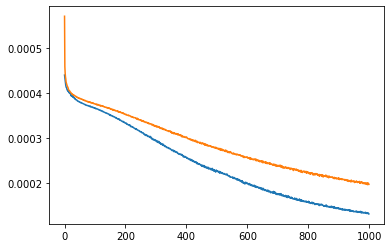

In [6]:
import matplotlib.pyplot as plt
plt.plot(Val_loss);
plt.plot(Train_loss);


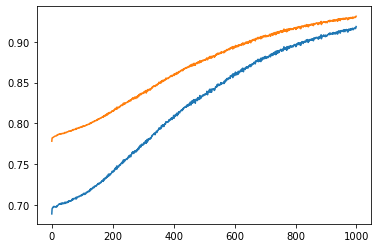

In [7]:
plt.plot(F1score)
plt.plot(Accuracy)

In [8]:
import pickle
with open("Val_loss_Trans", "wb") as fp:   #Pickling
    pickle.dump(Val_loss, fp)
    
with open("Train_loss_Trans", "wb") as fp:   #Pickling
    pickle.dump(Train_loss, fp)
    
with open("Accuracy_Trans", "wb") as fp:   #Pickling
    pickle.dump(Accuracy, fp)
    
with open("F1_Trans", "wb") as fp:   #Pickling
    pickle.dump(F1score, fp)

for MBR_NO,BRN_NO in mbrnlist:
    if featnorm==True:
        Data_train = load('Data/Data0930_'+str(MBR_NO)+'_'+str(BRN_NO)+'norm_train.npy',allow_pickle=True)
        Data_test =  load('Data/Data0930_'+str(MBR_NO)+'_'+str(BRN_NO)+'norm_test.npy',allow_pickle=True)
    else:
        Data_train = load('Data/Data0930_'+str(MBR_NO)+'_'+str(BRN_NO)+'train.npy',allow_pickle=True)
        Data_test =  load('Data/Data0930_'+str(MBR_NO)+'_'+str(BRN_NO)+'test.npy',allow_pickle=True)

    Xtrain_data,Ytrain_data,Xtest_data,Ytest_data = Data_load(Data_train,Data_test)
    torch.manual_seed(0)

    SRC_VOCAB_SIZE = Xtrain_data.shape[1]


    transformer = Seq2SeqTransformer(NUM_ENCODER_LAYERS, NUM_DECODER_LAYERS, EMB_SIZE,
                                     NHEAD, SRC_VOCAB_SIZE, TGT_VOCAB_SIZE, FFN_HID_DIM)
    summary = SummaryWriter()
    for p in transformer.parameters():
        if p.dim() > 1:
            nn.init.xavier_uniform_(p)

    transformer = transformer.to(device)

    loss_fn = torch.nn.CrossEntropyLoss()

    optimizer = torch.optim.Adam(transformer.parameters(), lr=0.0001, betas=(0.9, 0.98), eps=1e-9)

    NUM_EPOCHS = 1000
    best_val_loss=100000000
    for epoch in range(1, NUM_EPOCHS+1):
        start_time = timer()
        train_loss,_ = train_epoch(transformer, optimizer,Xtrain_data,Ytrain_data,loss_fn,device,BATCH_SIZE,bptt)
        end_time = timer()
        val_loss,acc,prec,reca,f1sc,confusion = evaluate(transformer,Xtrain_data,Ytrain_data,loss_fn,device,BATCH_SIZE,bptt)
        print((f"Epoch: {epoch}, Train loss: {train_loss:.3f}, Val loss: {val_loss:.3f}, "f"Epoch time = {(end_time - start_time):.3f}s"))
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_confusion=confusion
            best_acc=acc
            best_prec=prec
            best_reca=reca
            best_f1sc=f1sc
            best_model = transformer
        summary.add_scalar('val loss', val_loss, epoch)
        summary.add_scalar('total loss', train_loss, epoch)
        summary.add_scalar('f1 score', f1sc, epoch)
        summary.add_scalar('Accuracy', acc, epoch)
    now = datetime.now()
    now.strftime("%m/%d/%Y, %H:%M:%S")

    date_time = now.strftime("%m_%d_%Y")

    PATH='best_model_Trans_seq_'+date_time+'_'+str(MBR_NO)+'_'+str(BRN_NO)
    if featnorm==True:
        torch.save(best_model.state_dict(), PATH+'norm')
    else:
        torch.save(best_model.state_dict(), PATH)
    if featnorm==True:
        file_name='results/result_Trans_'+date_time+'_norm.txt'
    else:
        file_name='results/result_Trans_'+date_time+'.txt'
    text_to_append=PATH+'\t'+"Acc:"+str(best_acc)+'\t'+"prec:"+str(best_prec)+'\t'+"recall:"+str(best_reca)+'\t'+"f1sc:"+str(best_f1sc)
    print(text_to_append)
    with open(file_name, "a+") as file_object:
        # Move read cursor to the start of file.
        file_object.seek(0)
        # If file is not empty then append '\n'
        data = file_object.read(100)
        if len(data) > 0:
            file_object.write("\n")
        # Append text at the end of file
        file_object.write(text_to_append)